## IMAGE RECOGNITION


### Description:

- Dataset: https://www.cs.toronto.edu/~kriz/cifar.html
- Dataset can also be accessed through Keras inbuilt library.
- CIFAR-10 is a subset of the 80 million tiny images dataset created by __Canadian Institute for Advanced Research (CIFAR)__. 
- It consists of 60000 32x32x3 color images in 10 equal classes, (6000 images per class). 
- Each class of images corresponds to a physical object (automobile, cat, dog, airplane, etc).
- In total there are 10 classes including airplane, automobile, bird, cat, deer, dog, frog, horse, ship and a truck.

### Table of Contents

- 1.0. Data Importation and Exploration
- 2.0. Plotting Images
- 3.0. Reshaping Image Data
- 4.0. Normalizing Image Data
- 5.0. Principle Component Analysis (PCA)
- 6.0. Creating Functions to conduct Analysis
- 7.0. Random Forest without PCA
    - 7.1. Accuracy
    - 7.2. Confusion Matrix
    - 7.3. Classification Report
- 8.0. Random Forest with PCA
    - 8.1. Accuracy
    - 8.2. Confusion Matrix
    - 8.3. Classification Report    
- 9.0. Logistic Regression without PCA
    - 9.1. Accuracy
    - 9.2. Confusion Matrix
    - 9.3. Classification Report
- 10.0. Logistic Regression with PCA
    - 10.1. Accuracy
    - 10.2. Confusion Matrix
    - 10.3. Classification Report
- 11.0. Gradient Boosting without PCA
    - 11.1. Accuracy
    - 11.2. Confusion Matrix
    - 11.3. Classification Report
- 12.0. Gradient Boosting with PCA
    - 12.1. Accuracy
    - 12.2. Confusion Matrix
    - 1.3. Classification Report
- 13.0. Convolutional Neural Networks
    - 13.1. Preprocessing
- 14.0. Model 1 - 4 Layers
    - 14.1. Model 1 Compilation
    - 14.2. Model 1 Accuracy
    - 14.3. Model 1 Structure
    - 14.4. Model 1 Predictions
- 15.0. Model 2 - 6 Layers
    - 15.1. Model 2 Compilation
    - 15.2. Model 2 Accuracy
    - 15.3. Model 2 Structure
    - 15.4. Model 2 Predictions
- 16.0. Model 3 - 8 Layers
    - 16.1. Model 3 Compilation
    - 16.2. Model 3 Accuracy
    - 16.3. Model 3 Structure
    - 16.4. Model 3 Predictions    


In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn import metrics

import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from keras_sequential_ascii import sequential_model_to_ascii_printout

import time

import warnings
warnings.filterwarnings('ignore')

### 1.0. Data Importation and Exploration

In [3]:
from keras.datasets import cifar10

In [341]:
(X_train, y_train), (X_test, y_test)= cifar10.load_data()

In [296]:
print(type(X_train))
print(type(y_train))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [297]:
print(X_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [298]:
print(X_test.shape)
print(y_test.shape)

(10000, 32, 32, 3)
(10000, 1)


In [299]:
# Creating a DataFrame to view data in a different format
X_train_df =  pd.DataFrame.from_records(X_train)

In [300]:
X_train_df.shape

(50000, 32)

In [301]:
X_train_df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,"[[59, 62, 63], [43, 46, 45], [50, 48, 43], [68...","[[16, 20, 20], [0, 0, 0], [18, 8, 0], [51, 27,...","[[25, 24, 21], [16, 7, 0], [49, 27, 8], [83, 5...","[[33, 25, 17], [38, 20, 4], [87, 54, 25], [106...","[[50, 32, 21], [59, 32, 11], [102, 65, 34], [1...","[[71, 48, 29], [84, 53, 24], [110, 73, 37], [1...","[[97, 69, 40], [111, 75, 36], [123, 85, 43], [...","[[115, 82, 49], [119, 76, 33], [130, 90, 47], ...","[[137, 100, 68], [128, 82, 41], [132, 91, 51],...","[[154, 120, 89], [154, 112, 77], [156, 114, 82...",...,"[[141, 102, 65], [131, 80, 35], [139, 89, 46],...","[[143, 103, 72], [139, 87, 44], [138, 89, 42],...","[[149, 107, 74], [133, 80, 37], [136, 88, 48],...","[[172, 128, 76], [144, 88, 18], [135, 85, 35],...","[[202, 157, 82], [187, 129, 26], [151, 100, 25...","[[216, 174, 87], [193, 136, 16], [168, 122, 19...","[[220, 182, 91], [201, 150, 22], [186, 148, 24...","[[208, 170, 96], [201, 153, 34], [198, 161, 26...","[[180, 139, 96], [173, 123, 42], [186, 144, 30...","[[177, 144, 116], [168, 129, 94], [179, 142, 8..."
1,"[[154, 177, 187], [126, 137, 136], [105, 104, ...","[[140, 160, 169], [145, 153, 154], [125, 125, ...","[[140, 155, 164], [139, 146, 149], [115, 115, ...","[[136, 147, 155], [137, 142, 146], [122, 121, ...","[[129, 137, 144], [141, 146, 152], [136, 139, ...","[[136, 144, 149], [136, 149, 165], [127, 148, ...","[[146, 154, 172], [124, 138, 168], [88, 109, 1...","[[162, 172, 192], [110, 125, 154], [63, 77, 10...","[[127, 137, 138], [70, 90, 102], [37, 52, 67],...","[[71, 75, 69], [74, 98, 108], [72, 93, 112], [...",...,"[[162, 166, 182], [124, 142, 173], [110, 127, ...","[[149, 147, 158], [58, 63, 83], [29, 39, 55], ...","[[174, 170, 183], [95, 95, 116], [57, 63, 81],...","[[156, 149, 165], [151, 150, 174], [153, 158, ...","[[167, 159, 172], [148, 145, 166], [102, 104, ...","[[174, 164, 170], [141, 137, 150], [44, 46, 56...","[[164, 155, 160], [141, 139, 152], [115, 119, ...","[[175, 167, 166], [156, 154, 160], [154, 160, ...","[[165, 154, 128], [156, 152, 130], [159, 161, ...","[[163, 148, 120], [158, 148, 122], [163, 156, ..."


In [302]:
X_train[0,:1]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        [ 68,  54,  42],
        [ 98,  73,  52],
        [119,  91,  63],
        [139, 107,  75],
        [145, 110,  80],
        [149, 117,  89],
        [149, 120,  93],
        [131, 103,  77],
        [125,  99,  76],
        [142, 115,  91],
        [144, 112,  86],
        [137, 105,  79],
        [129,  97,  71],
        [137, 106,  79],
        [134, 106,  76],
        [124,  97,  64],
        [139, 113,  78],
        [139, 112,  75],
        [133, 105,  69],
        [136, 105,  74],
        [139, 108,  77],
        [152, 120,  89],
        [163, 131, 100],
        [168, 136, 108],
        [159, 129, 102],
        [158, 130, 104],
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]]], dtype=uint8)

### 2.0. Plotting Images

In [303]:
class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [304]:
def plot_images(x, y, number_of_images=6):
    fig, axes1 = plt.subplots(number_of_images,number_of_images,figsize=(10,10))
    for j in range(number_of_images):
        for k in range(number_of_images):
            i = np.random.choice(range(len(x)))
            title = class_names[y[i:i+1][0][0]]
            axes1[j][k].title.set_text(title)
            axes1[j][k].set_axis_off()
            axes1[j][k].imshow(x[i:i+1][0]) 

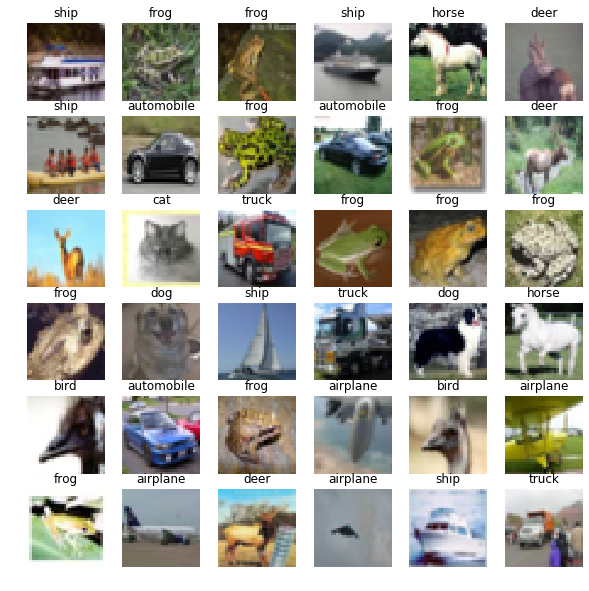

In [305]:
plot_images(X_train, y_train)

### 3.0. Reshaping Image Data

In [342]:
# Reshaping data
X_train = X_train.reshape(50000, 3*32*32) #50000, 32, 32, 3
X_test  = X_test.reshape(10000, 3*32*32)

In [343]:
# Converting a two dimensional array to one dimensional array
y_train = y_train.ravel()
y_test  = y_test.ravel()

In [344]:
print(X_train.shape)
print(y_train.shape)

(50000, 3072)
(50000,)


In [345]:
print(X_test.shape)
print(y_test.shape)

(10000, 3072)
(10000,)


### 4.0. Normalizing Image Data

In [346]:
# PCA performs best with a normalized feature set. 
# We will perform standard scalar normalization to normalize our feature set. 
# We need to normalize first before we move to perform the PCA

from sklearn.preprocessing import StandardScaler

start = time.time()

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

00:00:04.82


### 5.0. Principle Component Analysis (PCA)

In [99]:
from sklearn.decomposition import PCA
pca = PCA()  
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test) 

In [100]:
explained_variance = pca.explained_variance_ratio_

In [101]:
explained_variance

array([2.69201967e-01, 1.13705036e-01, 7.16496439e-02, ...,
       7.88883326e-09, 7.33453165e-09, 7.30039453e-09])

In [102]:
# Shows percentage of variance explained by each component
explained_variance.cumsum()

array([0.26920197, 0.382907  , 0.45455665, ..., 0.99999999, 0.99999999,
       1.        ])

In [103]:
# We will choose 56 components as they explain 85% of the variance in both datasets.
print("Components with 85% Variance:'{}'".format(explained_variance.cumsum()[56]))

Components with 85% Variance:'0.8504475020683085'


In [104]:
pca = PCA(n_components=56)  
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test) 

### 6.0. Creating Functions to conduct Analysis

In [25]:
def Accuracy(algorithm):
    
    # Train data
    y_pred_train = algorithm.predict(X_train)

    # Test data
    y_pred_test = algorithm.predict(X_test)

    print('\nR² Train Data:', algorithm.score(X_train,y_train))
    print('R² Test Data:', algorithm.score(X_test,y_test))

    # Predictions based on Test data
    print ('-------------------------------------------------')
    print ("Test Data:")
    print ("Mean Absolute Error: {}".format(metrics.mean_absolute_error(y_test, y_pred_test)))
    print ("Mean Squared Error: {}".format(metrics.mean_squared_error(y_test, y_pred_test)))
    print ("Root Mean Squared Error: {}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))))

In [26]:
def conf_matrix(algorithm):
    
    y_pred_test = algorithm.predict(X_test)

    mat = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(7,7))
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
    plt.title("CONFUSION MATRIX", fontsize=15)
    plt.xlabel('true label', fontsize=12)
    plt.ylabel('predicted label', fontsize=12);

In [27]:
def classification_report(algorithm):
    
    # Train data
    y_pred_train = algorithm.predict(X_train)

    # Test data
    y_pred_test = algorithm.predict(X_test)
    
    print('Classification Report Training Set\n', metrics.classification_report(y_train, y_pred_train))
    print('\nClassification Report Testing Set\n', metrics.classification_report(y_test, y_pred_test))

### 7.0. Random Forest without PCA

In [88]:
# Data Shape
print(X_train.shape)
print(y_train.shape)

(50000, 3072)
(50000,)


In [45]:
from sklearn.ensemble import RandomForestClassifier

Random_Forest = RandomForestClassifier(n_estimators=500, 
                                    max_depth=10, 
                                    max_features='auto')  
start = time.time()
Random_Forest.fit(X_train, y_train)
end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

00:08:08.73


#### 7.1. Accuracy

In [29]:
Accuracy(Random_Forest)


R² Train Data: 0.60784
R² Test Data: 0.4347
-------------------------------------------------
Test Data:
Mean Absolute Error: 2.0354
Mean Squared Error: 10.4946
Root Mean Squared Error: 3.2395370039559666


#### 7.2. Confusion Matrix

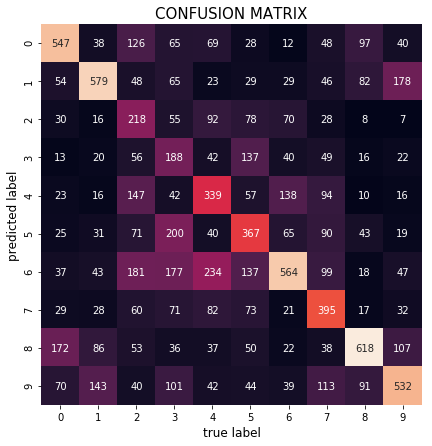

In [30]:
conf_matrix(Random_Forest)

#### 7.3. Classification Report

In [31]:
classification_report(Random_Forest)

Classification Report Training Set
               precision    recall  f1-score   support

           0       0.62      0.63      0.62      5000
           1       0.74      0.78      0.76      5000
           2       0.56      0.35      0.43      5000
           3       0.70      0.48      0.57      5000
           4       0.50      0.46      0.48      5000
           5       0.60      0.58      0.59      5000
           6       0.45      0.66      0.54      5000
           7       0.72      0.60      0.65      5000
           8       0.64      0.76      0.69      5000
           9       0.63      0.77      0.69      5000

   micro avg       0.61      0.61      0.61     50000
   macro avg       0.62      0.61      0.60     50000
weighted avg       0.62      0.61      0.60     50000


Classification Report Testing Set
               precision    recall  f1-score   support

           0       0.51      0.55      0.53      1000
           1       0.51      0.58      0.54      1000
      

### 8.0. Random Forest with PCA

In [ ]:
# Data Shape
print(X_train.shape)
print(y_train.shape)

In [28]:
from sklearn.ensemble import RandomForestClassifier

Random_Forest = RandomForestClassifier(n_estimators=500, 
                                    max_depth=10, 
                                    max_features='auto')  
start = time.time()
Random_Forest.fit(X_train, y_train)
end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

00:01:55.29


#### 8.1. Accuracy

In [29]:
Accuracy(Random_Forest)


R² Train Data: 0.60784
R² Test Data: 0.4347
-------------------------------------------------
Test Data:
Mean Absolute Error: 2.0354
Mean Squared Error: 10.4946
Root Mean Squared Error: 3.2395370039559666


#### 8.2. Confusion Matrix

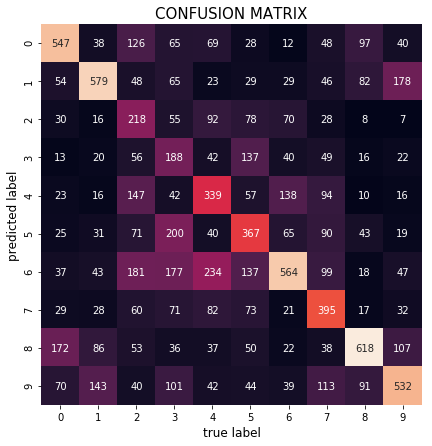

In [30]:
conf_matrix(Random_Forest)

#### 8.3. Classification Report

In [31]:
classification_report(Random_Forest)

Classification Report Training Set
               precision    recall  f1-score   support

           0       0.62      0.63      0.62      5000
           1       0.74      0.78      0.76      5000
           2       0.56      0.35      0.43      5000
           3       0.70      0.48      0.57      5000
           4       0.50      0.46      0.48      5000
           5       0.60      0.58      0.59      5000
           6       0.45      0.66      0.54      5000
           7       0.72      0.60      0.65      5000
           8       0.64      0.76      0.69      5000
           9       0.63      0.77      0.69      5000

   micro avg       0.61      0.61      0.61     50000
   macro avg       0.62      0.61      0.60     50000
weighted avg       0.62      0.61      0.60     50000


Classification Report Testing Set
               precision    recall  f1-score   support

           0       0.51      0.55      0.53      1000
           1       0.51      0.58      0.54      1000
      

### 9.0. Logistic Regression  without PCA

In [89]:
# Data Shape
print(X_train.shape)
print(y_train.shape)

(50000, 3072)
(50000,)


In [27]:
from sklearn.linear_model import LogisticRegression

start = time.time()

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

01:45:23.13


#### 9.1. Accuracy

In [28]:
Accuracy(logreg)


R² Train Data: 0.52234
R² Test Data: 0.3689
-------------------------------------------------
Test Data:
Mean Absolute Error: 2.3189
Mean Squared Error: 12.2061
Root Mean Squared Error: 3.4937229426501464


#### 9.2. Confusion Matrix

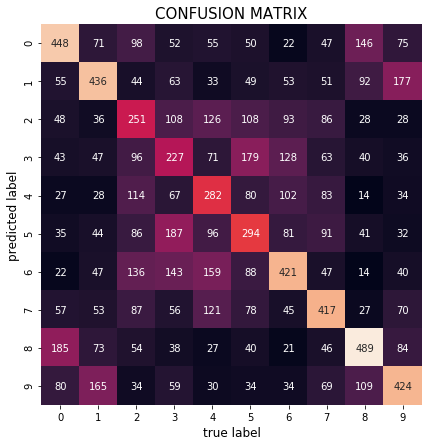

In [29]:
conf_matrix(logreg)

#### 9.3. Classification Report

In [30]:
classification_report(logreg)

Classification Report Training Set
               precision    recall  f1-score   support

           0       0.55      0.59      0.57      5000
           1       0.58      0.61      0.59      5000
           2       0.46      0.38      0.42      5000
           3       0.42      0.39      0.41      5000
           4       0.50      0.44      0.47      5000
           5       0.46      0.45      0.46      5000
           6       0.52      0.58      0.55      5000
           7       0.57      0.55      0.56      5000
           8       0.59      0.63      0.61      5000
           9       0.56      0.60      0.58      5000

   micro avg       0.52      0.52      0.52     50000
   macro avg       0.52      0.52      0.52     50000
weighted avg       0.52      0.52      0.52     50000


Classification Report Testing Set
               precision    recall  f1-score   support

           0       0.42      0.45      0.43      1000
           1       0.41      0.44      0.42      1000
      

### 10.0. Logistic Regression with PCA

In [105]:
# Data Shape
print(X_train.shape)
print(y_train.shape)

(50000, 56)
(50000,)


In [63]:
from sklearn.linear_model import LogisticRegression

start = time.time()

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

00:00:16.38


#### 10.1. Accuracy

In [64]:
Accuracy(logreg)


R² Train Data: 0.3832
R² Test Data: 0.381
-------------------------------------------------
Test Data:
Mean Absolute Error: 2.2556
Mean Squared Error: 11.8656
Root Mean Squared Error: 3.444648022657758


#### 10.2. Confusion Matrix

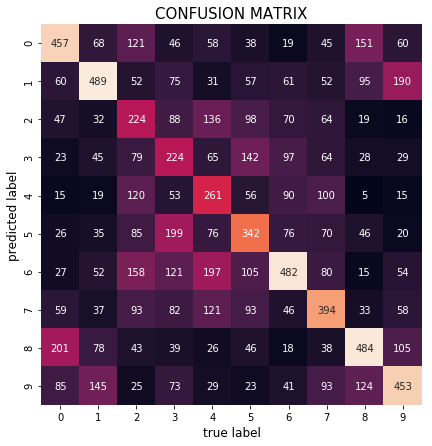

In [65]:
conf_matrix(logreg)

#### 10.3. Classification Report

In [66]:
classification_report(logreg)

Classification Report Training Set
               precision    recall  f1-score   support

           0       0.43      0.46      0.44      5000
           1       0.41      0.48      0.44      5000
           2       0.31      0.23      0.26      5000
           3       0.29      0.23      0.26      5000
           4       0.36      0.27      0.31      5000
           5       0.35      0.34      0.35      5000
           6       0.36      0.45      0.40      5000
           7       0.39      0.39      0.39      5000
           8       0.47      0.51      0.49      5000
           9       0.41      0.47      0.44      5000

   micro avg       0.38      0.38      0.38     50000
   macro avg       0.38      0.38      0.38     50000
weighted avg       0.38      0.38      0.38     50000


Classification Report Testing Set
               precision    recall  f1-score   support

           0       0.43      0.46      0.44      1000
           1       0.42      0.49      0.45      1000
      

### 11.0. Gradient_boosting without PCA

In [347]:
# Data Shape
print(X_train.shape)
print(y_train.shape)

(50000, 3072)
(50000,)


In [348]:
from sklearn import ensemble

start = time.time()

Gradient_boost = ensemble.GradientBoostingClassifier(subsample=0.3, n_estimators=50, max_depth=10,loss='deviance')
Gradient_boost.fit(X_train, y_train)

end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

09:24:40.93


#### 11.1. Accuracy

In [349]:
Accuracy(Gradient_boost)


R² Train Data: 0.94134
R² Test Data: 0.4472
-------------------------------------------------
Test Data:
Mean Absolute Error: 1.9817
Mean Squared Error: 10.2101
Root Mean Squared Error: 3.1953247096343746


#### 11.2. Confusion Matrix

In [350]:
conf_matrix(Gradient_boost)

TypeError: Expected sequence or array-like, got estimator GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=10,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=0.3, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

#### 11.3. Classification Report

In [ ]:
classification_report(Gradient_boost)

### 12.0. Gradient_boosting with PCA

In [69]:
# Data Shape
print(X_train.shape)
print(y_train.shape)

(50000, 56)
(50000,)


In [74]:
from sklearn import ensemble

start = time.time()

Gradient_boost = ensemble.GradientBoostingClassifier(subsample=0.3, n_estimators=50, max_depth=10,loss='deviance')
Gradient_boost.fit(X_train, y_train)

end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

00:09:43.77


#### 12.1. Accuracy

In [75]:
Accuracy(Gradient_boost)


R² Train Data: 0.8766
R² Test Data: 0.4313
-------------------------------------------------
Test Data:
Mean Absolute Error: 2.0534
Mean Squared Error: 10.6772
Root Mean Squared Error: 3.267598506548808


#### 12.2. Confusion Matrix

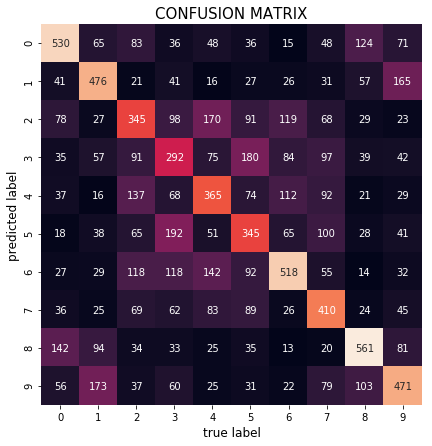

In [76]:
conf_matrix(Gradient_boost)

#### 12.3. Classification Report

In [77]:
classification_report(Gradient_boost)

Classification Report Training Set
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      5000
           1       0.94      0.93      0.93      5000
           2       0.80      0.81      0.80      5000
           3       0.86      0.81      0.84      5000
           4       0.83      0.86      0.84      5000
           5       0.90      0.83      0.86      5000
           6       0.83      0.92      0.87      5000
           7       0.92      0.89      0.90      5000
           8       0.91      0.94      0.92      5000
           9       0.93      0.92      0.92      5000

   micro avg       0.88      0.88      0.88     50000
   macro avg       0.88      0.88      0.88     50000
weighted avg       0.88      0.88      0.88     50000


Classification Report Testing Set
               precision    recall  f1-score   support

           0       0.50      0.53      0.52      1000
           1       0.53      0.48      0.50      1000
      

### 13.0. Convolutional Neural Networks

In [321]:
print(X_train.shape,X_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [322]:
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)

X_train: (50000, 32, 32, 3)
X_test: (10000, 32, 32, 3)


In [323]:
print(y_train.shape)
print(y_test.shape)

(50000, 1)
(10000, 1)


In [324]:
print(np.unique(y_train,return_counts=True))
print(np.unique(y_test,return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
      dtype=int64))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
      dtype=int64))


### 13.1. Preprocessing

In [325]:
# Convert to float32 for type consistency
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize values to 1 from 0 to 255 (256 values of piXels)
X_train /= 255
X_test /= 255

In [313]:
# Not to be run with sparse categorical entropy (needed for confusion matrix)
# Convert class vectors to binary class matrices
# So instead of one column with 10 values, create 10 binary columns
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

### 14.0. Model 1 - 4 Layers

In [243]:
model1 = Sequential()
num_classes = 10


model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3)))
model1.add(Conv2D(32, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))


model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

# Flattening
model1.add(Flatten())

# Full connection          
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))         
model1.add(Dense(10, activation='softmax'))

model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 5, 5, 64)          0         
__________

### 14.1. Model 1 Compilation

In [244]:
model1.compile(optimizer=keras.optimizers.SGD(lr=0.001), 
               loss='sparse_categorical_crossentropy', 
               metrics=['accuracy'])

In [246]:
mx1 = model1.fit(X_train, y_train,
                    batch_size=32,
                    epochs=50,
                    verbose=2,
                    validation_data=(X_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
 - 93s - loss: 2.2980 - acc: 0.1141 - val_loss: 2.2852 - val_acc: 0.1525
Epoch 2/50
 - 92s - loss: 2.2678 - acc: 0.1458 - val_loss: 2.2217 - val_acc: 0.1949
Epoch 3/50
 - 93s - loss: 2.1786 - acc: 0.1818 - val_loss: 2.1021 - val_acc: 0.2157
Epoch 4/50
 - 91s - loss: 2.1106 - acc: 0.2033 - val_loss: 2.0478 - val_acc: 0.2478
Epoch 5/50
 - 91s - loss: 2.0732 - acc: 0.2213 - val_loss: 2.0189 - val_acc: 0.2659
Epoch 6/50
 - 90s - loss: 2.0436 - acc: 0.2351 - val_loss: 1.9712 - val_acc: 0.2902
Epoch 7/50
 - 89s - loss: 2.0037 - acc: 0.2516 - val_loss: 1.9212 - val_acc: 0.3181
Epoch 8/50
 - 89s - loss: 1.9640 - acc: 0.2699 - val_loss: 1.8708 - val_acc: 0.3399
Epoch 9/50
 - 90s - loss: 1.9157 - acc: 0.2862 - val_loss: 1.8200 - val_acc: 0.3681
Epoch 10/50
 - 90s - loss: 1.8761 - acc: 0.3007 - val_loss: 1.7877 - val_acc: 0.3716
Epoch 11/50
 - 89s - loss: 1.8388 - acc: 0.3170 - val_loss: 1.7354 - val_acc: 0.3849
Epoch 12/50
 - 89s - los

### 14.2. Model 1 Accuracy

In [247]:
scores = model1.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 56.04%


In [248]:
score = model1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.2344396699905396
Test accuracy: 0.5604


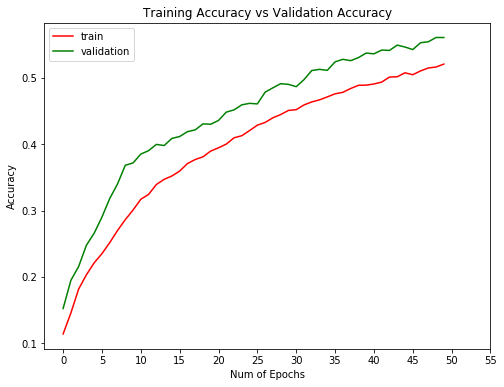

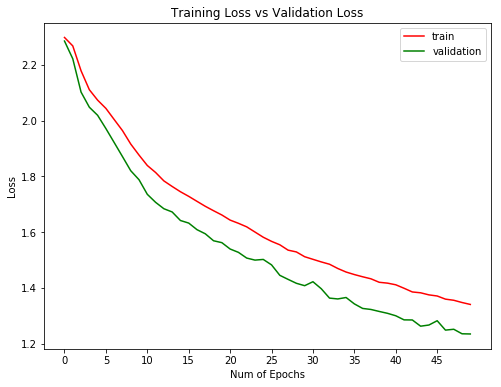

In [249]:
# Plots for training and testing process: loss and accuracy

plt.figure(0)
plt.plot(mx1.history['acc'],'r')
plt.plot(mx1.history['val_acc'],'g')
plt.xticks(np.arange(0, 60, 5.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])


plt.figure(1)
plt.plot(mx1.history['loss'],'r')
plt.plot(mx1.history['val_loss'],'g')
plt.xticks(np.arange(0, 50, 5.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])


plt.show()

### 14.3. Model 1 Structure

In [250]:
sequential_model_to_ascii_printout(model1)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####     32   32    3
              Conv2D    \|/  -------------------       896     0.3%
                relu   #####     30   30   32
              Conv2D    \|/  -------------------      9248     3.4%
                relu   #####     28   28   32
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     14   14   32
             Dropout    | || -------------------         0     0.0%
                       #####     14   14   32
              Conv2D    \|/  -------------------     18496     6.8%
                relu   #####     12   12   64
              Conv2D    \|/  -------------------     36928    13.6%
                relu   #####     10   10   64
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####      5    5   64
             Dropout    | || -------------------         0     0.0%
              

### 14.4. Model 1 Predictions

In [251]:
test_labels = y_test

In [252]:
y_pred1 = model1.predict(X_test)

In [253]:
# Rounding the predictions
rd_ypred1 = model1.predict_classes(X_test)

In [254]:
print(np.unique(rounded_predictions,return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64), array([2060,  683,   10,  104, 1004,  715, 2645,  933, 1031,  815],
      dtype=int64))


In [255]:
cm = confusion_matrix(test_labels, rounded_predictions)

In [256]:
def conf_matrix_cnn(predictions):
    
    cm = confusion_matrix(test_labels, predictions)
    plt.figure(figsize=(7,7))
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
    plt.title("CONFUSION MATRIX", fontsize=15)
    plt.xlabel('true label', fontsize=12)
    plt.ylabel('predicted label', fontsize=12);
    plt.show()

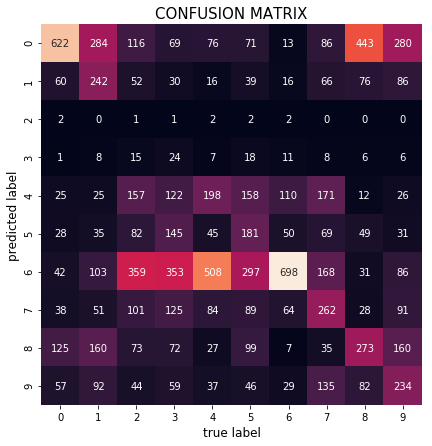

In [257]:
conf_matrix_cnn(rd_ypred1)

In [258]:
def class_report(predictions):
    print('Classification Report\n', metrics.classification_report(y_test, predictions))

In [259]:
class_report(rd_ypred1)

Classification Report
               precision    recall  f1-score   support

           0       0.62      0.49      0.55      1000
           1       0.67      0.76      0.71      1000
           2       0.51      0.30      0.37      1000
           3       0.42      0.31      0.36      1000
           4       0.51      0.32      0.39      1000
           5       0.49      0.54      0.51      1000
           6       0.56      0.76      0.65      1000
           7       0.57      0.63      0.60      1000
           8       0.58      0.79      0.67      1000
           9       0.59      0.70      0.64      1000

   micro avg       0.56      0.56      0.56     10000
   macro avg       0.55      0.56      0.55     10000
weighted avg       0.55      0.56      0.55     10000



### 15.0.  Model 2 - 6 Layers

In [269]:
model2 = Sequential()

model2.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32,32,3)))
model2.add(Conv2D(32,(3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
 
model2.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model2.add(Conv2D(64, (3,3), padding='same',  activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))


model2.add(Conv2D(128,(3,3),padding='same', activation='relu'))
model2.add(Conv2D(128,(3,3),padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))
 
model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.5))

model2.add(Dense(10, activation='softmax'))
 
model2.summary()   

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 15, 15, 64)        36928     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 7, 7, 64)          0         
__________

### 15.1. Model 2 Compilation

In [272]:
model2.compile(optimizer=keras.optimizers.SGD(lr=0.001), 
               loss='sparse_categorical_crossentropy', 
               metrics=['accuracy'])

In [274]:
mx2 = model2.fit(X_train, y_train,
                    batch_size=32,
                    epochs=100,
                    verbose=2,
                    validation_data=(X_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
 - 163s - loss: 2.2422 - acc: 0.1546 - val_loss: 2.1898 - val_acc: 0.2358
Epoch 2/100
 - 158s - loss: 2.1440 - acc: 0.1963 - val_loss: 2.0692 - val_acc: 0.2453
Epoch 3/100
 - 157s - loss: 2.0758 - acc: 0.2227 - val_loss: 2.0246 - val_acc: 0.2682
Epoch 4/100
 - 157s - loss: 2.0438 - acc: 0.2386 - val_loss: 1.9975 - val_acc: 0.2775
Epoch 5/100
 - 157s - loss: 2.0195 - acc: 0.2492 - val_loss: 1.9627 - val_acc: 0.2922
Epoch 6/100
 - 157s - loss: 1.9972 - acc: 0.2612 - val_loss: 1.9389 - val_acc: 0.3035
Epoch 7/100
 - 157s - loss: 1.9706 - acc: 0.2746 - val_loss: 1.9079 - val_acc: 0.3151
Epoch 8/100
 - 157s - loss: 1.9462 - acc: 0.2837 - val_loss: 1.8826 - val_acc: 0.3217
Epoch 9/100
 - 157s - loss: 1.9128 - acc: 0.2990 - val_loss: 1.9627 - val_acc: 0.2961
Epoch 10/100
 - 157s - loss: 1.8837 - acc: 0.3059 - val_loss: 1.8137 - val_acc: 0.3553
Epoch 11/100
 - 157s - loss: 1.8544 - acc: 0.3147 - val_loss: 1.8061 - val_acc: 0.3577
Ep

Epoch 95/100
 - 157s - loss: 0.9438 - acc: 0.6662 - val_loss: 0.8771 - val_acc: 0.6896
Epoch 96/100
 - 157s - loss: 0.9439 - acc: 0.6641 - val_loss: 0.8747 - val_acc: 0.6902
Epoch 97/100
 - 156s - loss: 0.9396 - acc: 0.6680 - val_loss: 0.8666 - val_acc: 0.6916
Epoch 98/100
 - 157s - loss: 0.9301 - acc: 0.6710 - val_loss: 0.8665 - val_acc: 0.6921
Epoch 99/100
 - 158s - loss: 0.9264 - acc: 0.6701 - val_loss: 0.8929 - val_acc: 0.6868
Epoch 100/100
 - 158s - loss: 0.9233 - acc: 0.6715 - val_loss: 0.8740 - val_acc: 0.6901


### 15.2. Model 2 Accuracy

In [275]:
scores = model2.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 69.01%


In [276]:
score = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8739749415397644
Test accuracy: 0.6901


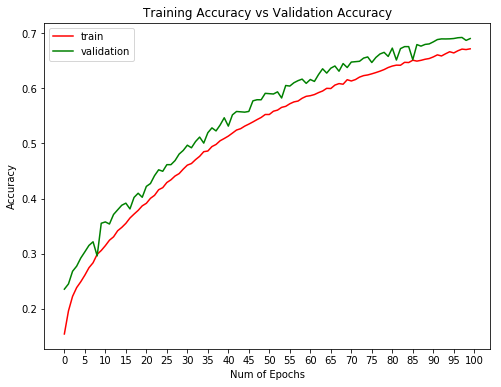

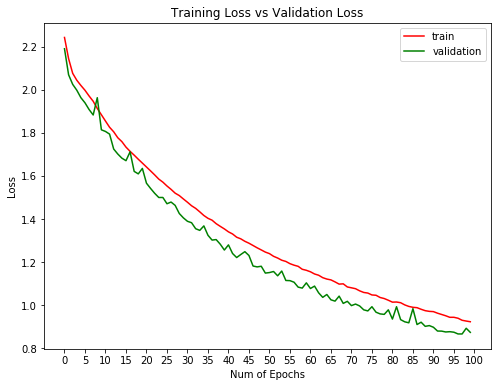

In [288]:
# Plots for training and testing process: loss and accuracy

plt.figure(0)
plt.plot(mx2.history['acc'],'r')
plt.plot(mx2.history['val_acc'],'g')
plt.xticks(np.arange(0, 105, 5.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])

plt.figure(1)
plt.plot(mx2.history['loss'],'r')
plt.plot(mx2.history['val_loss'],'g')
plt.xticks(np.arange(0, 105, 5.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])


plt.show()

### 15.3. Model 2 Structure

In [278]:
sequential_model_to_ascii_printout(model2)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####     32   32    3
              Conv2D    \|/  -------------------       896     0.1%
                relu   #####     32   32   32
              Conv2D    \|/  -------------------      9248     1.0%
                relu   #####     30   30   32
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     15   15   32
             Dropout    | || -------------------         0     0.0%
                       #####     15   15   32
              Conv2D    \|/  -------------------     18496     2.1%
                relu   #####     15   15   64
              Conv2D    \|/  -------------------     36928     4.2%
                relu   #####     15   15   64
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####      7    7   64
             Dropout    | || -------------------         0     0.0%
              

### 15.4. Model 2 Predictions

In [279]:
y_pred2 = model2.predict(X_test)

In [280]:
# Rounding the predictions
rd_ypred2 = model2.predict_classes(X_test)

In [281]:
print(np.unique(rounded_predictions,return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64), array([2060,  683,   10,  104, 1004,  715, 2645,  933, 1031,  815],
      dtype=int64))


In [282]:
cm = confusion_matrix(test_labels, rounded_predictions)

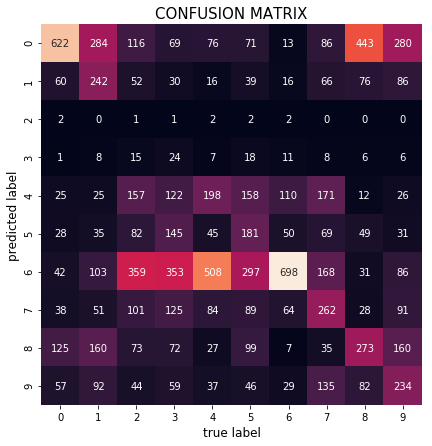

In [283]:
conf_matrix_cnn(rd_ypred2)

In [284]:
class_report(rd_ypred2)

Classification Report
               precision    recall  f1-score   support

           0       0.76      0.68      0.71      1000
           1       0.83      0.84      0.84      1000
           2       0.59      0.55      0.57      1000
           3       0.49      0.42      0.46      1000
           4       0.64      0.59      0.61      1000
           5       0.50      0.72      0.59      1000
           6       0.75      0.80      0.77      1000
           7       0.73      0.75      0.74      1000
           8       0.89      0.74      0.81      1000
           9       0.79      0.82      0.80      1000

   micro avg       0.69      0.69      0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



### 16.0.  Model 3 - 8 Layers

In [326]:
model3 = Sequential()

model3.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32,32,3)))
model3.add(Conv2D(32,(3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))
 
model3.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model3.add(Conv2D(64, (3,3), padding='same',  activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))


model3.add(Conv2D(128,(3,3),padding='same', activation='relu'))
model3.add(Conv2D(128,(3,3),padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(260,(3,3),padding='same', activation='relu'))
model3.add(Conv2D(260,(3,3),padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.25))
 
model3.add(Flatten())
model3.add(Dense(1000, activation='relu'))
model3.add(Dropout(0.5))

model3.add(Dense(10, activation='softmax'))
 
model3.summary()   

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_107 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_108 (Conv2D)          (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_51 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_109 (Conv2D)          (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_110 (Conv2D)          (None, 15, 15, 64)        36928     
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 7, 7, 64)          0         
__________

### 16.1. Model 3 Compilation

In [329]:
model3.compile(Adam(lr=.0001), 
               loss='sparse_categorical_crossentropy', 
               metrics=['accuracy'])

In [330]:
mx3 = model3.fit(X_train, y_train,
                    batch_size=64,
                    epochs=100,
                    verbose=2,
                    validation_data=(X_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
 - 207s - loss: 1.9576 - acc: 0.2530 - val_loss: 1.7168 - val_acc: 0.3642
Epoch 2/100
 - 209s - loss: 1.6195 - acc: 0.3958 - val_loss: 1.4808 - val_acc: 0.4486
Epoch 3/100
 - 206s - loss: 1.4740 - acc: 0.4532 - val_loss: 1.3903 - val_acc: 0.4870
Epoch 4/100
 - 206s - loss: 1.3672 - acc: 0.5002 - val_loss: 1.2814 - val_acc: 0.5287
Epoch 5/100
 - 205s - loss: 1.2872 - acc: 0.5343 - val_loss: 1.2128 - val_acc: 0.5655
Epoch 6/100
 - 205s - loss: 1.2088 - acc: 0.5653 - val_loss: 1.1573 - val_acc: 0.5791
Epoch 7/100
 - 204s - loss: 1.1417 - acc: 0.5904 - val_loss: 1.0622 - val_acc: 0.6213
Epoch 8/100
 - 205s - loss: 1.0752 - acc: 0.6182 - val_loss: 0.9832 - val_acc: 0.6475
Epoch 9/100
 - 204s - loss: 1.0274 - acc: 0.6337 - val_loss: 0.9629 - val_acc: 0.6561
Epoch 10/100
 - 204s - loss: 0.9780 - acc: 0.6531 - val_loss: 0.9001 - val_acc: 0.6776
Epoch 11/100
 - 204s - loss: 0.9379 - acc: 0.6664 - val_loss: 0.8891 - val_acc: 0.6823
Ep

Epoch 95/100
 - 202s - loss: 0.1062 - acc: 0.9628 - val_loss: 0.8336 - val_acc: 0.8183
Epoch 96/100
 - 202s - loss: 0.1070 - acc: 0.9626 - val_loss: 0.8359 - val_acc: 0.8197
Epoch 97/100
 - 202s - loss: 0.1013 - acc: 0.9645 - val_loss: 0.8328 - val_acc: 0.8201
Epoch 98/100
 - 202s - loss: 0.1043 - acc: 0.9635 - val_loss: 0.8400 - val_acc: 0.8184
Epoch 99/100
 - 202s - loss: 0.1028 - acc: 0.9649 - val_loss: 0.8057 - val_acc: 0.8219
Epoch 100/100
 - 201s - loss: 0.1055 - acc: 0.9638 - val_loss: 0.8408 - val_acc: 0.8213


### 16.2. Model 3 Accuracy

In [331]:
scores = model3.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 82.13%


In [332]:
score = model3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8408194362401963
Test accuracy: 0.8213


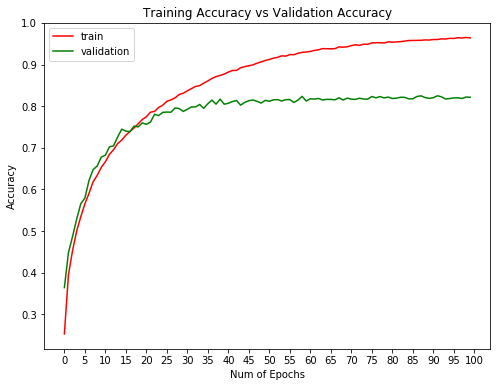

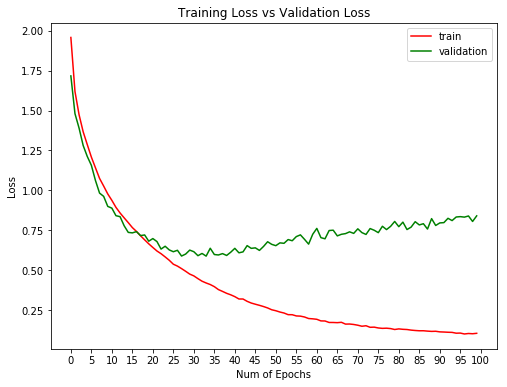

In [333]:
# Plots for training and testing process: loss and accuracy

plt.figure(0)
plt.plot(mx3.history['acc'],'r')
plt.plot(mx3.history['val_acc'],'g')
plt.xticks(np.arange(0, 105, 5.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])

plt.figure(1)
plt.plot(mx3.history['loss'],'r')
plt.plot(mx3.history['val_loss'],'g')
plt.xticks(np.arange(0,105, 5.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])


plt.show()

### 16.3. Model 3 Structure

In [334]:
sequential_model_to_ascii_printout(model3)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####     32   32    3
              Conv2D    \|/  -------------------       896     0.1%
                relu   #####     32   32   32
              Conv2D    \|/  -------------------      9248     0.6%
                relu   #####     30   30   32
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     15   15   32
             Dropout    | || -------------------         0     0.0%
                       #####     15   15   32
              Conv2D    \|/  -------------------     18496     1.3%
                relu   #####     15   15   64
              Conv2D    \|/  -------------------     36928     2.5%
                relu   #####     15   15   64
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####      7    7   64
             Dropout    | || -------------------         0     0.0%
              

### 16.4. Model 3 Predictions

In [335]:
y_pred3 = model3.predict(X_test)

In [336]:
# Rounding the predictions
rd_ypred3 = model3.predict_classes(X_test)

In [337]:
print(np.unique(rounded_predictions,return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64), array([2060,  683,   10,  104, 1004,  715, 2645,  933, 1031,  815],
      dtype=int64))


In [338]:
cm = confusion_matrix(test_labels, rounded_predictions)

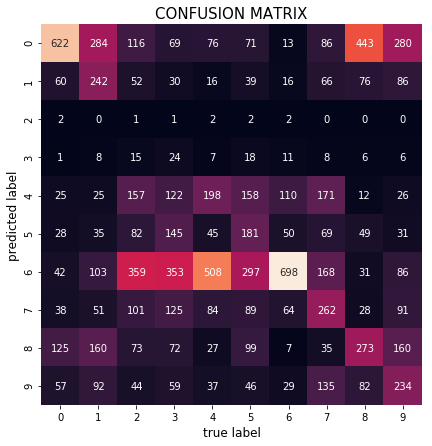

In [339]:
conf_matrix_cnn(rd_ypred3)

In [340]:
class_report(rd_ypred3)

Classification Report
               precision    recall  f1-score   support

           0       0.85      0.86      0.85      1000
           1       0.86      0.94      0.90      1000
           2       0.80      0.75      0.77      1000
           3       0.71      0.61      0.66      1000
           4       0.79      0.79      0.79      1000
           5       0.74      0.73      0.73      1000
           6       0.87      0.88      0.87      1000
           7       0.82      0.87      0.84      1000
           8       0.85      0.93      0.89      1000
           9       0.90      0.86      0.88      1000

   micro avg       0.82      0.82      0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000

